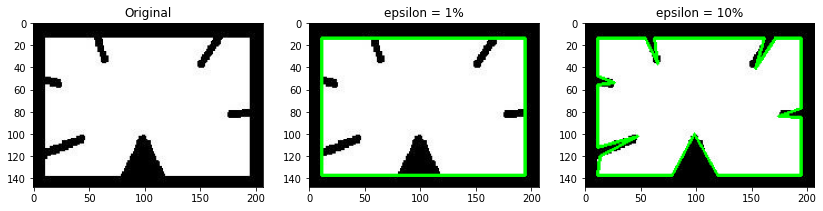

In [1]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('images/approx.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

#1st contour
cnt = contours[0]
perimeter = cv2.arcLength(cnt,True)

first_output = image.copy()
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
cv2.drawContours(first_output, [approx], 0, (0,255,0), 2)

second_output = image.copy()
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
cv2.drawContours(second_output, [approx], 0, (0,255,0), 2)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(first_output[...,::-1]);plt.title("epsilon = 1%");
plt.subplot(133);plt.imshow(second_output[...,::-1]);plt.title("epsilon = 10%");

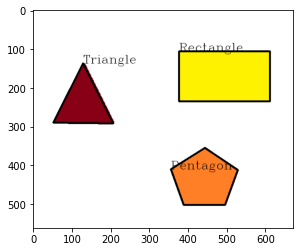

In [2]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('images/shapes2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary_image = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)
imagecontours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#for each of the contours detected, the shape of the contours is approximated using approxPolyDP() function and the contours are drawn in the image using drawContours() function
for c in imagecontours:
    epsilon = 0.01 * cv2.arcLength(c, True)
    approximations = cv2.approxPolyDP(c, epsilon, True)
    cv2.drawContours(image, [approximations], 0, (0), 3)
    
    #the name of the detected shapes are written on the image
    i, j = approximations[0][0] 
    
    if len(approximations) == 3:
        cv2.putText(image, "Triangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 4:
        cv2.putText(image, "Rectangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 5:
        cv2.putText(image, "Pentagon", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif 6 < len(approximations) < 15:
        cv2.putText(image, "Ellipse", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    else:
        cv2.putText(image, "Circle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)

plt.imshow(image[...,::-1])

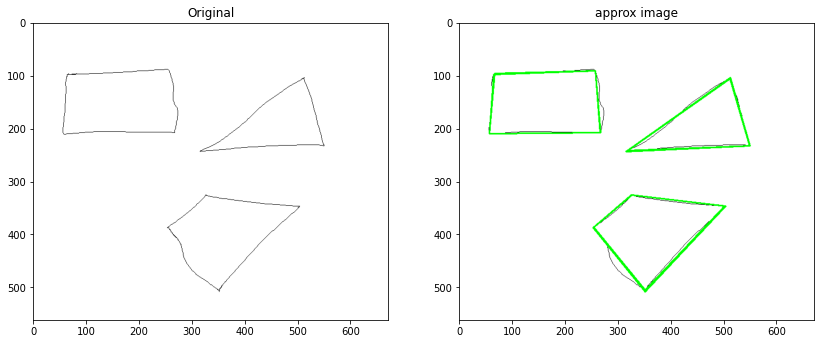

In [4]:
import numpy as np
import cv2

# Load image and keep a copy
image = cv2.imread('images/sketch.png')
 
# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()


# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)

plt.figure(figsize=[14,8])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(copy, cmap='gray');plt.title("approx image");